In [151]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import folium as fm
from shapely.geometry import Polygon

from math import radians, asin, sqrt, sin, cos, log, log10

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestClassifier

from collections import Counter

from IPython.core.display import Markdown, display, HTML

In [152]:
# beautify the screen display
%matplotlib inline
pd.options.display.max_columns = 200
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("""<style>
  .rendered_html tr, .rendered_html th,  .rendered_html td {   text-align: right; }  
  .rendered_html :first-child {   text-align: left; } 
  .rendered_html :last-child {   text-align: left; }
  </style>"""))

# Tweak default output of pyplots
screen_dpi = plt.rcParams['figure.dpi']
# 'figsize' is in inches, so convert desired default figure size in pixels into inches using the given sceen dpi 
plt.rcParams["figure.figsize"] = [800/screen_dpi,600/screen_dpi]

In [153]:
zones = pd.read_csv('Dataset/Processed/Zone 1-3.csv', index_col='Id')
# zones = zones['Id']
zones.head()

,Zone
Id,
30,1
42,1
40,1
43,1
13,1


In [154]:
# comparison = pd.read_csv('Dataset/Processed/hourly_comparison.csv', sep=',', decimal='.', header=0, index_col='id', dtype=np.float64)
comparison_clustered = pd.read_csv('Dataset/clustered_comparison_5.csv', sep=',', decimal='.', header=0, index_col='id')

comparison_clustered = comparison_clustered.join(zones, how='inner').drop('Zone', axis=1)

comparison_clustered.head()
# comparison_clustered['Cluster ID (k=5)'].tolist()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,Cluster ID (k=5)
1,-0.031963,-0.005128,-0.042945,-0.235294,-0.227273,-0.310345,-0.339286,-0.371901,-0.220588,-0.234973,-0.180488,-0.147059,-0.116981,-0.026393,0.056604,0.000000,0.053191,0.002342,-0.016787,0.020225,0.097046,-0.051429,-0.028090,-0.042345,-0.082707,-0.079498,-0.184783,-0.226190,-0.224490,-0.251799,-0.246377,-0.211268,-0.171975,-0.181347,-0.161290,-0.078067,0.003390,-0.028249,0.008310,0.025070,0.119318,0.000000,0.051136,-0.075630,0.007673,0.000000,-0.029703,-0.006623,0.078261,-0.087912,-0.195122,-0.202614,-0.184615,-0.228346,-0.280000,-0.265625,-0.173913,-0.229947,-0.162393,-0.058333,-0.070922,-0.010381,0.028249,0.106017,0.123711,0.007916,0.007874,0.016043,-0.057895,-0.028754,0.034247,-0.093525,0.027888,-0.128713,-0.268293,-0.319149,-0.242857,-0.328000,-0.349206,-0.349206,-0.293333,-0.173077,-0.195312,-0.058824,0.052632,0.046070,0.081967,0.067708,0.122616,0.084577,0.061224,0.062069,0.036320,0.002755,-0.021538,-0.056856,-0.081712,-0.104762,-0.181347,-0.238636,-0.280488,-0.294118,-0.197183,-0.272727,-0.257143,-0.223214,-0.132812,-0.052265,0.059190,0.092437,0.125628,0.106952,0.100244,0.059666,-0.002469,0.113253,0.043880,0.055556,0.057057,0.060317,0.043165,-0.064935,-0.155340,-0.182320,-0.276074,-0.270270,-0.278195,-0.281690,-0.166667,-0.042553,0.108333,0.151515,0.182058,0.216216,0.211786,0.157534,0.150413,0.069021,0.041985,0.078512,0.102845,0.081633,0.063712,0.005814,0.156794,0.095436,-0.141463,-0.155080,-0.076923,-0.167785,-0.092308,-0.123967,-0.059701,-0.006289,0.104762,0.196970,0.264901,0.265957,0.215517,0.230435,0.133479,0.126638,0.217184,0.152174,0.121212,0.083916,0.140625,0.024194,3
2,0.571429,0.621053,0.375000,0.090909,0.120000,0.200000,0.000000,-0.076923,0.234043,0.084746,0.179487,0.320000,0.321429,0.352113,0.467391,0.388535,0.242105,0.277228,0.192661,0.198473,0.140351,0.140097,0.039548,0.161677,0.124183,0.200000,-0.065217,-0.102564,-0.283582,-0.242424,-0.409836,-0.164179,-0.258427,-0.076923,-0.034965,0.041420,0.215686,0.096774,0.180617,0.161538,0.156522,0.039301,0.102881,-0.107692,0.025641,-0.022831,-0.023810,0.022989,0.128834,-0.090909,-0.083333,-0.316456,-0.428571,-0.411765,-0.388889,-0.307692,-0.224490,-0.159420,-0.170068,-0.016760,0.064677,0.092308,0.166667,0.104348,0.176991,0.189655,0.120690,0.121569,0.150685,0.271795,0.412587,0.366906,0.353383,0.320000,0.154930,0.032258,-0.234043,-0.166667,-0.191489,-0.191489,-0.159420,-0.196262,0.009709,0.149606,0.296552,0.215686,0.303797,0.366460,0.359477,0.321212,0.223529,0.292135,0.341772,0.377483,0.366197,0.402985,0.385965,0.397849,0.482759,0.277778,0.111111,0.071429,0.000000,0.444444,0.111111,0.365079,0.305556,0.420000,0.380282,0.405797,0.407895,0.479290,0.445161,0.452229,0.358209,0.355705,0.414286,0.504000,0.511450,0.543307,0.509804,0.534247,0.320000,0.333333,0.235294,0.176471,-0.047619,0.333333,0.411765,0.345455,0.485714,0.620000,0.624060,0.642857,0.590909,0.505051,0.485380,0.554286,0.531646,0.511111,0.561290,0.546667,0.600000,0.480916,0.548387,0.415730,0.442623,0.352941,0.176471,0.142857,0.384615,0.212121,0.189189,0.230769,0.604651,0.445545,0.514706,0.637584,0.525000,0.547445,0.384615,0.441558,0.492958,0.393548,0.432258,0.443709,0.566434,0.439394,4
3,-0.087719,-0.387755,-0.260870,-0.421053,-0.500000,-0.560976,-0.567568,-0.395349,-0.652174,-0.295775,-0.268817,-0.341176,-0.104762,-0.133333,-0.055556,0.014706,0.000000,-0.067568,-0.253521,-0.105590,-0.140351,-0.132743,-0.075630,-0.142857,-0.123596,-0.200000,-0

In [155]:
categories = pd.read_csv('yelp_categories_percent.csv', sep=',', decimal='.', header=0, index_col='id_left')
# categories = categories.join(zones, how='inner').drop('Zone', axis=1)
categories = categories.join(zones, how='right').fillna(0)
categories.head()

,active_%,arts_%,auto_%,beautysvc_%,education_%,eventservices_%,financialservices_%,food_%,health_%,homeservices_%,hotelstravel_%,localflavor_%,localservices_%,massmedia_%,nightlife_%,pets_%,professional_%,publicservicesgovt_%,realestate_%,religiousorgs_%,restaurants_%,shopping_%,Zone
Id,,,,,,,,,,,,,,,,,,,,,,,
30,0.000000,0.030303,0.0,0.121212,0.000000,0.181818,0.0,0.121212,0.000000,0.000000,0.181818,0.0,0.000000,0.0,0.242424,0.0,0.000000,0.0,0.0,0.0,0.121212,0.000000,1
42,0.031250,0.000000,0.0,0.062500,0.000000,0.062500,0.0,0.156250,0.031250,0.000000,0.062500,0.0,0.000000,0.0,0.187500,0.0,0.000000,0.0,0.0,0.0,0.250000,0.156250,1
40,0.000000,0.011858,0.0,0.110672,0.000000,0.138340,0.0,0.118577,0.011858,0.003953,0.118577,0.0,0.011858,0.0,0.075099,0.0,0.000000,0.0,0.0,0.0,0.268775,0.130435,1
43,0.013514,0.013514,0.0,0.067568,0.000000,0.094595,0.0,0.189189,0.000000,0.013514,0.094595,0.0,0.013514,0.0,0.175676,0.0,0.013514,0.0,0.0,0.0,0.202703,0.108108,1
13,0.012658,0.025316,0.0,0.037975,0.012658,0.037975,0.0,0.215190,0.000000,0.012658,0.037975,0.0,0.012658,0.0,0.088608,0.0,0.000000,0.0,0.0,0.0,0.392405,0.113924,1


In [156]:
prices = pd.read_csv('yelp_price_count_division.csv', sep=',', decimal='.', header=0, index_col='id_left')
ratings = pd.read_csv('yelp_rating_count_division.csv', sep=',', decimal='.', header=0, index_col='id_left')

# categories = categories.join(zones, how='inner').drop('Zone', axis=1)
model_features = categories.join(prices['expensive'], how='left').join(ratings['average_rating']).fillna(0)
model_features.head()

,active_%,arts_%,auto_%,beautysvc_%,education_%,eventservices_%,financialservices_%,food_%,health_%,homeservices_%,hotelstravel_%,localflavor_%,localservices_%,massmedia_%,nightlife_%,pets_%,professional_%,publicservicesgovt_%,realestate_%,religiousorgs_%,restaurants_%,shopping_%,Zone,expensive,average_rating
Id,,,,,,,,,,,,,,,,,,,,,,,,,
30,0.000000,0.030303,0.0,0.121212,0.000000,0.181818,0.0,0.121212,0.000000,0.000000,0.181818,0.0,0.000000,0.0,0.242424,0.0,0.000000,0.0,0.0,0.0,0.121212,0.000000,1,0.363636,3.954545
42,0.031250,0.000000,0.0,0.062500,0.000000,0.062500,0.0,0.156250,0.031250,0.000000,0.062500,0.0,0.000000,0.0,0.187500,0.0,0.000000,0.0,0.0,0.0,0.250000,0.156250,1,0.312500,3.609375
40,0.000000,0.011858,0.0,0.110672,0.000000,0.138340,0.0,0.118577,0.011858,0.003953,0.118577,0.0,0.011858,0.0,0.075099,0.0,0.000000,0.0,0.0,0.0,0.268775,0.130435,1,0.565217,3.709486
43,0.013514,0.013514,0.0,0.067568,0.000000,0.094595,0.0,0.189189,0.000000,0.013514,0.094595,0.0,0.013514,0.0,0.175676,0.0,0.013514,0.0,0.0,0.0,0.202703,0.108108,1,0.148649,3.837838
13,0.012658,0.025316,0.0,0.037975,0.012658,0.037975,0.0,0.215190,0.000000,0.012658,0.037975,0.0,0.012658,0.0,0.088608,0.0,0.000000,0.0,0.0,0.0,0.392405,0.113924,1,0.430380,3.727848


In [157]:
model_cats = model_features[['arts_%', 'food_%', 'homeservices_%', 'hotelstravel_%', 'localservices_%', 'restaurants_%', 'shopping_%', 'expensive', 'average_rating']]
# model_cats = categories[['arts_%', 'food_%', 'homeservices_%', 'hotelstravel_%', 'localservices_%', 'restaurants_%', 'shopping_%']]

model_cats = model_features[['arts_%', 'homeservices_%', 'hotelstravel_%', 'localservices_%', 'restaurants_%', 'expensive']]
# model_cats = categories[['arts_%', 'homeservices_%', 'hotelstravel_%', 'localservices_%', 'restaurants_%']]

model_cats.head()
# len(model_cats)

,arts_%,homeservices_%,hotelstravel_%,localservices_%,restaurants_%,expensive
Id,,,,,,
30,0.030303,0.000000,0.181818,0.000000,0.121212,0.363636
42,0.000000,0.000000,0.062500,0.000000,0.250000,0.312500
40,0.011858,0.003953,0.118577,0.011858,0.268775,0.565217
43,0.013514,0.013514,0.094595,0.013514,0.202703,0.148649
13,0.025316,0.012658,0.037975,0.012658,0.392405,0.430380


In [158]:
model_cats.corr()

,arts_%,homeservices_%,hotelstravel_%,localservices_%,restaurants_%,expensive
arts_%,1.000000,0.035166,-0.085798,-0.102701,-0.016070,-0.107304
homeservices_%,0.035166,1.000000,-0.104514,-0.054409,-0.027955,0.075866
hotelstravel_%,-0.085798,-0.104514,1.000000,-0.073788,-0.085411,-0.088551
localservices_%,-0.102701,-0.054409,-0.073788,1.000000,-0.277742,-0.010356
restaurants_%,-0.016070,-0.027955,-0.085411,-0.277742,1.000000,0.368165
expensive,-0.107304,0.075866,-0.088551,-0.010356,0.368165,1.000000


In [8]:
# categories_area = pd.read_csv('yelp_categories_per_division.csv', sep=',', decimal='.', header=0, index_col='id_left')
# # categories_area = categories_area.join(zones, how='inner').drop('Zone', axis=1)
# categories_area = categories_area.join(zones, how='right').fillna(0)
# categories_area.head()

In [9]:
# model_cats_area = categories_area[['arts', 'food', 'homeservices', 'hotelstravel', 'localservices', 'restaurants', 'shopping']]
# model_cats_area.head()

In [10]:
# model_cats_area.corr()

In [11]:
# # K-Fold Validation
# from sklearn.model_selection import KFold
# from sklearn.ensemble import RandomForestClassifier

# MAX_FEATURES = 4
# MIN_SAMPLES = 2
# NUM_TREES = 200

# # y = comparison_clustered['Cluster ID (k=5)'].tolist()
# labels = comparison_clustered['Cluster ID (k=5)']
# # labels[labels == 2] = 0
# y = list(map(lambda label: str(label), labels.tolist()))
# y = np.array(y)
# # y = np.array(y)
# # z = list(map(lambda k: str(k), z))
# X = model_cats.values
# # X = categories.values
# # X = model_cats_area.values
# # X = categories_area.values

# NUM_FOLDS = 5

# scores = []
# p = None
# l = None
# k_folds = KFold(n_splits=NUM_FOLDS, shuffle=True)
# for train_index, validation_index in k_folds.split(X):
#     X_train, X_test = X[train_index], X[validation_index]
#     y_train, y_test = y[train_index], y[validation_index]
    
#     classifier = RandomForestClassifier(min_samples_leaf=MIN_SAMPLES, n_estimators=NUM_TREES, max_features=MAX_FEATURES, n_jobs=-1, class_weight='balanced_subsample')
#     classifier.fit(X_train, y_train)
#     predictions = classifier.predict(X_test)
#     p = predictions
#     l = y_test
#     stats = calculate_stats(predictions, y_test)
#     score = classifier.score(X_test, y_test)
#     scores.append(score)

# print(scores)
# print('AVG Score: {}'.format(np.mean(scores)))

In [12]:
# from sklearn.metrics import precision_recall_fscore_support

# def calculate_stats(prediction, labels):
# #     print(prediction)
# #     print(labels)
#     reults = precision_recall_fscore_support(labels, predictions)
#     return 0

In [13]:
# from sklearn.metrics import precision_recall_fscore_support

# results = precision_recall_fscore_support(l, p, labels=['0', '1', '2', '3', '4'])
# results

In [135]:
# from sklearn.metrics import classification_report
# target_names = ['0', '1', '2', '3', '4']
# print(classification_report(l, p, target_names=target_names))
# model_cats

In [174]:
from sklearn.model_selection import LeaveOneOut
import math
MAX_FEATURES = 20
MIN_SAMPLES = 2
NUM_TREES = 500


# labels = z1_data['Cluster ID (k=5)']
labels = comparison_clustered['Cluster ID (k=5)']
# labels[labels == 1] = 0
# labels[labels == 2] = 0
# labels[labels == 3] = 0
# labels[labels == 2] = 0
y = list(map(lambda label: str(label), labels.tolist()))
y = np.array(y)
# X = model_cats.values
X = model_features.values
# X = categories.values
# X = model_cats_area.values
# X = categories_area.values

predictions = []

loo = LeaveOneOut()
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classifier = RandomForestClassifier(min_samples_leaf=MIN_SAMPLES, n_estimators=500, max_features=1, n_jobs=-1, class_weight='balanced_subsample')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_probs = classifier.predict_proba(X_test)
    y_pred_prob = y_probs.max(axis=1)
#     print(y_pred_prob)
    data_point = {
        'predicted': y_pred[0],
        'probablity': y_pred_prob[0],
        'true_value': y_test[0],
        'is_correct': y_pred[0] == y_test[0],
        'bin': math.floor(y_pred_prob*10)/10,
    }
    print(data_point)
    predictions.append(data_point)
    
prediction_df = pd.DataFrame.from_records(predictions)
prediction_df.head()

{'predicted': '2', 'probablity': 0.2451730453262674, 'true_value': '3', 'is_correct': False, 'bin': 0.2}
{'predicted': '1', 'probablity': 0.26493171526450815, 'true_value': '4', 'is_correct': False, 'bin': 0.2}
{'predicted': '3', 'probablity': 0.2986686592604959, 'true_value': '2', 'is_correct': False, 'bin': 0.2}
{'predicted': '2', 'probablity': 0.26142807369139387, 'true_value': '4', 'is_correct': False, 'bin': 0.2}
{'predicted': '4', 'probablity': 0.28709901835553014, 'true_value': '4', 'is_correct': True, 'bin': 0.2}
{'predicted': '2', 'probablity': 0.32344514049334094, 'true_value': '1', 'is_correct': False, 'bin': 0.3}
{'predicted': '3', 'probablity': 0.30384953052535496, 'true_value': '3', 'is_correct': True, 'bin': 0.3}
{'predicted': '1', 'probablity': 0.2814240856764161, 'true_value': '3', 'is_correct': False, 'bin': 0.2}
{'predicted': '1', 'probablity': 0.28200653844100737, 'true_value': '3', 'is_correct': False, 'bin': 0.2}
{'predicted': '1', 'probablity': 0.2833011221107713

{'predicted': '0', 'probablity': 0.3666526656383492, 'true_value': '3', 'is_correct': False, 'bin': 0.3}
{'predicted': '0', 'probablity': 0.26146053650407347, 'true_value': '4', 'is_correct': False, 'bin': 0.2}
{'predicted': '0', 'probablity': 0.43169309410250506, 'true_value': '0', 'is_correct': True, 'bin': 0.4}
{'predicted': '0', 'probablity': 0.3828416212269646, 'true_value': '2', 'is_correct': False, 'bin': 0.3}
{'predicted': '0', 'probablity': 0.4555656149625966, 'true_value': '1', 'is_correct': False, 'bin': 0.4}
{'predicted': '0', 'probablity': 0.2993433785219586, 'true_value': '2', 'is_correct': False, 'bin': 0.2}
{'predicted': '0', 'probablity': 0.33834720127006473, 'true_value': '1', 'is_correct': False, 'bin': 0.3}
{'predicted': '0', 'probablity': 0.37600692437614786, 'true_value': '3', 'is_correct': False, 'bin': 0.3}
{'predicted': '0', 'probablity': 0.3168265809023596, 'true_value': '0', 'is_correct': True, 'bin': 0.3}
{'predicted': '0', 'probablity': 0.31322383609849747,

{'predicted': '0', 'probablity': 0.47647145462085116, 'true_value': '0', 'is_correct': True, 'bin': 0.4}
{'predicted': '0', 'probablity': 0.46683261856128344, 'true_value': '0', 'is_correct': True, 'bin': 0.4}
{'predicted': '0', 'probablity': 0.47211770205088616, 'true_value': '0', 'is_correct': True, 'bin': 0.4}
{'predicted': '0', 'probablity': 0.36281491480436484, 'true_value': '0', 'is_correct': True, 'bin': 0.3}
{'predicted': '0', 'probablity': 0.3701827236961951, 'true_value': '2', 'is_correct': False, 'bin': 0.3}
{'predicted': '0', 'probablity': 0.42326611897081035, 'true_value': '2', 'is_correct': False, 'bin': 0.4}
{'predicted': '0', 'probablity': 0.4760255937681402, 'true_value': '0', 'is_correct': True, 'bin': 0.4}
{'predicted': '2', 'probablity': 0.41991413646995296, 'true_value': '0', 'is_correct': False, 'bin': 0.4}
{'predicted': '0', 'probablity': 0.3553441505106253, 'true_value': '0', 'is_correct': True, 'bin': 0.3}
{'predicted': '0', 'probablity': 0.38040728496299975, '

,bin,is_correct,predicted,probablity,true_value
0,0.2,False,2,0.245173,3
1,0.2,False,1,0.264932,4
2,0.2,False,3,0.298669,2
3,0.2,False,2,0.261428,4
4,0.2,True,4,0.287099,4


In [98]:
# from sklearn import svm
# from sklearn.model_selection import train_test_split
# from sklearn.multiclass import OneVsRestClassifier


# MAX_FEATURES = 5
# MIN_SAMPLES = 2
# NUM_TREES = 500


# # labels = z1_data['Cluster ID (k=5)']
# labels = comparison_clustered['Cluster ID (k=5)']
# # labels[labels == 1] = 0
# # labels[labels == 2] = 0
# # labels[labels == 3] = 0
# # labels[labels == 2] = 0
# y = list(map(lambda label: str(label), labels.tolist()))
# y = np.array(y)
# X = model_cats.values
# # X = categories.values
# # X = model_cats_area.values
# # X = categories_area.values

# random_state = np.random.RandomState(42)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=.2,
# #                                                     random_state=random_state,
#                                                    )

# print(y_test)



# classifier = RandomForestClassifier(min_samples_leaf=MIN_SAMPLES, n_estimators=500, max_features=1, n_jobs=-1, class_weight='balanced_subsample')
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
# y_probs = classifier.predict_proba(X_test)
# y_pred_prob = y_probs.max(axis=1)


['0' '4' '3' '1' '2' '0' '1' '3' '2' '0' '0' '0' '0' '0' '0' '0' '2' '2'
 '3' '3' '2' '0' '0' '2' '0' '3' '0' '2' '3' '0' '1' '0' '2' '2' '3' '0'
 '0' '2']


In [99]:
# prediction_df = pd.DataFrame.from_records(y_pred, columns=['predicted'])
# prediction_df['probablity'] = y_pred_prob
# prediction_df['true_value'] = y_test
# prediction_df['is_correct'] = np.equal(prediction_df['predicted'], prediction_df['true_value'])
# prediction_df.head()

,predicted,probablity,true_value,is_correct
0,0,0.594385,0,True
1,1,0.285435,4,False
2,3,0.457731,3,True
3,2,0.544758,1,False
4,0,0.411957,2,False


In [100]:
# prediction_df.loc[prediction_df['probablity'] == 1.0, 'bin'] = 1.0
# prediction_df.loc[np.logical_and(prediction_df['probablity'] >= 0.9, prediction_df['probablity'] < 1.0), 'bin'] = 0.9
# prediction_df.loc[np.logical_and(prediction_df['probablity'] >= 0.8, prediction_df['probablity'] < 0.9), 'bin'] = 0.8
# prediction_df.loc[np.logical_and(prediction_df['probablity'] >= 0.7, prediction_df['probablity'] < 0.8), 'bin'] = 0.7
# prediction_df.loc[np.logical_and(prediction_df['probablity'] >= 0.6, prediction_df['probablity'] < 0.7), 'bin'] = 0.6
# prediction_df.loc[np.logical_and(prediction_df['probablity'] >= 0.5, prediction_df['probablity'] < 0.6), 'bin'] = 0.5
# prediction_df.loc[np.logical_and(prediction_df['probablity'] >= 0.4, prediction_df['probablity'] < 0.5), 'bin'] = 0.4
# prediction_df.loc[np.logical_and(prediction_df['probablity'] >= 0.3, prediction_df['probablity'] < 0.4), 'bin'] = 0.3
# prediction_df.loc[np.logical_and(prediction_df['probablity'] >= 0.2, prediction_df['probablity'] < 0.3), 'bin'] = 0.2
# prediction_df.loc[np.logical_and(prediction_df['probablity'] >= 0.1, prediction_df['probablity'] < 0.2), 'bin'] = 0.1
# prediction_df.loc[np.logical_and(prediction_df['probablity'] >= 0.0, prediction_df['probablity'] < 0.1), 'bin'] = 0.0
# prediction_df.head()

,predicted,probablity,true_value,is_correct,bin
0,0,0.594385,0,True,0.5
1,1,0.285435,4,False,0.2
2,3,0.457731,3,True,0.4
3,2,0.544758,1,False,0.5
4,0,0.411957,2,False,0.4


In [175]:
p_0 = prediction_df[prediction_df['predicted'] == '0']
p_1 = prediction_df[prediction_df['predicted'] == '1']
p_2 = prediction_df[prediction_df['predicted'] == '2']
p_3 = prediction_df[prediction_df['predicted'] == '3']
p_4 = prediction_df[prediction_df['predicted'] == '4']
# p_0.head()
p_4

,bin,is_correct,predicted,probablity,true_value
4,0.2,True,4,0.287099,4
13,0.2,False,4,0.248216,1
15,0.2,False,4,0.232867,3
26,0.2,False,4,0.278080,1
41,0.2,False,4,0.228179,2
52,0.3,False,4,0.330187,2
68,0.2,False,4,0.230063,3
69,0.2,True,4,0.250778,4
70,0.2,False,4,0.233403,3
71,0.2,False,4,0.263540,3


In [176]:
test_size = len(y)
p_0_dist = p_0.pivot_table(values='probablity',index='is_correct',columns='bin',fill_value=0, aggfunc=lambda x: len(x)/test_size)
p_1_dist = p_1.pivot_table(values='probablity',index='is_correct',columns='bin',fill_value=0, aggfunc=lambda x: len(x)/test_size)
p_2_dist = p_2.pivot_table(values='probablity',index='is_correct',columns='bin',fill_value=0, aggfunc=lambda x: len(x)/test_size)
p_3_dist = p_3.pivot_table(values='probablity',index='is_correct',columns='bin',fill_value=0, aggfunc=lambda x: len(x)/test_size)
p_4_dist = p_4.pivot_table(values='probablity',index='is_correct',columns='bin',fill_value=0, aggfunc=lambda x: len(x)/test_size)

p_0_dist.head()

bin,0.2,0.3,0.4,0.5
is_correct,,,,
False,0.057895,0.078947,0.057895,0.010526
True,0.015789,0.142105,0.131579,0.010526


In [177]:
f = plt.figure(figsize=(10,3))
def plot_results(distribution, color, plot, title):
    
    bar_height = 0.02
#     plt.figure(figsize=(30,5))
#     plt.subplot(1,5,index)
#     ax = plt.subplot(1, 5, index, figsize=(20,5))
#     f, ax = plt.subplots(1, 5)
#     ax = f.add_subplot(1, 5, index)
#     print(distribution)
    
    trues = distribution.loc[True].values if True in distribution.index else np.zeros(len(distribution.columns))
    falses = distribution.loc[False].values if False in distribution.index else np.zeros(len(distribution.columns))
    
#     print('trues: {}'.format(trues))
#     print('falses: {}'.format(falses))
    
    plot.barh(distribution.columns, trues, height=bar_height, color=color, align='edge')
    plot.barh(distribution.columns-bar_height, falses, height=bar_height, color='gray', align='edge')
#     plt.xlim(0, 1.2)
#     plt.xticks([0, 0.05, 0.1, 0.15, 0.2,0.25],['0%', '5%', '10%', '15%', '20%', '25%'])
#     plt.ylim(0, 1.0)
#     plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    plot.set_xticks([0, 0.05, 0.1, 0.15, 0.2,0.25])
    plot.set_xticklabels(['0%', '5%', '10%', '15%', '20%', '25%'])
    plot.set_xlabel('Total Predictions (% of all locations)')
    plot.set_ylim(0, 1.0)
    plot.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    plot.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
    if (title == 'Cluster 0 Predictions'):
        plot.set_ylabel('Prediction Confidence')
    plot.set_title(title)
#     plt.show()

<Figure size 720x216 with 0 Axes>

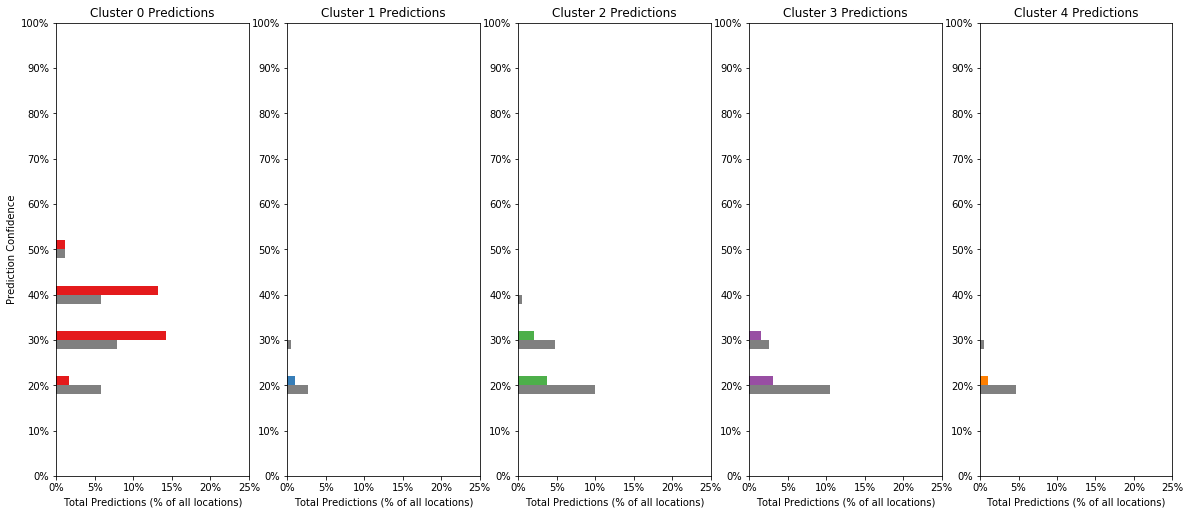

In [178]:
# f, ax = plt.subplots(1, 5, sharey=True)
f, ax = plt.subplots(1, 5)
f.set_figwidth(20)

plot_results(p_0_dist, '#e41a1c', ax[0], 'Cluster 0 Predictions')
plot_results(p_1_dist, '#377eb8', ax[1], 'Cluster 1 Predictions')
plot_results(p_2_dist, '#4daf4a', ax[2], 'Cluster 2 Predictions')
plot_results(p_3_dist, '#984ea3', ax[3], 'Cluster 3 Predictions')
plot_results(p_4_dist, '#ff7f00', ax[4], 'Cluster 4 Predictions')

plt.show()
# bar_height = 0.02
# plt.figure(figsize=(20,10))
# # plt.barh(list(p_0_dist.columns), list(p_0_dist.loc[True].values), height=bar_height)
# plt.barh(p_0_dist.columns, p_0_dist.loc[True].values, height=bar_height, color='b', align='edge')
# plt.barh(p_0_dist.columns-bar_height, p_0_dist.loc[False].values, height=bar_height, color='r', align='edge')
# plt.ylim(0, 1.0)
# plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# plt.show()

In [62]:
p_0_10 = p_0[p_0['probablity'] == 1.0]
p_0_9 = p_0[p_0['probablity'] >= 0.9]
p_0_8 = p_0[np.logical_and(p_0['probablity'] >= 0.8, p_0['probablity'] < 0.9)]
p_0_7 = p_0[np.logical_and(p_0['probablity'] >= 0.7, p_0['probablity'] < 0.8)]
p_0_6 = p_0[np.logical_and(p_0['probablity'] >= 0.6, p_0['probablity'] < 0.7)]
p_0_5 = p_0[np.logical_and(p_0['probablity'] >= 0.5, p_0['probablity'] < 0.6)]
p_0_4 = p_0[np.logical_and(p_0['probablity'] >= 0.4, p_0['probablity'] < 0.5)]
p_0_3 = p_0[np.logical_and(p_0['probablity'] >= 0.3, p_0['probablity'] < 0.4)]
p_0_2 = p_0[np.logical_and(p_0['probablity'] >= 0.2, p_0['probablity'] < 0.3)]
p_0_1 = p_0[np.logical_and(p_0['probablity'] >= 0.1, p_0['probablity'] < 0.2)]
p_0_0 = p_0[np.logical_and(p_0['probablity'] >= 0.0, p_0['probablity'] < 0.1)]

In [137]:
def calculate_percentiles(df):
    p_10 = df[df['probablity'] == 1.0]
    p_9 = df[df['probablity'] >= 0.9]
    p_8 = df[np.logical_and(df['probablity'] >= 0.8, df['probablity'] < 0.9)]
    p_7 = df[np.logical_and(df['probablity'] >= 0.7, df['probablity'] < 0.8)]
    p_6 = df[np.logical_and(df['probablity'] >= 0.6, df['probablity'] < 0.7)]
    p_5 = df[np.logical_and(df['probablity'] >= 0.5, df['probablity'] < 0.6)]
    p_4 = df[np.logical_and(df['probablity'] >= 0.4, df['probablity'] < 0.5)]
    p_3 = df[np.logical_and(df['probablity'] >= 0.3, df['probablity'] < 0.4)]
    p_2 = df[np.logical_and(df['probablity'] >= 0.2, df['probablity'] < 0.3)]
    p_1 = df[np.logical_and(df['probablity'] >= 0.1, df['probablity'] < 0.2)]
    p_0 = df[np.logical_and(df['probablity'] >= 0.0, df['probablity'] < 0.1)]
    
    percent_10 = [0,0] if p_10.empty else p_10.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x)).values[0]
    percent_9 = [0,0] if p_9.empty else p_9.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x)).values[0]
    percent_8 = [0,0] if p_8.empty else p_8.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x)).values[0]
    percent_7 = [0,0] if p_7.empty else p_7.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x))
    percent_6 = [0,0] if p_6.empty else p_6.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x)).values[0]
    percent_5 = [0,0] if p_5.empty else p_5.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x)).values[0]
    percent_4 = [0,0] if p_4.empty else p_4.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x)).values[0]
    percent_3 = [0,0] if p_3.empty else p_3.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x)).values[0]
    percent_2 = [0,0] if p_2.empty else p_2.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x)).values[0]
    percent_1 = [0,0] if p_1.empty else p_1.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x)).values[0]
    percent_0 = [0,0] if p_0.empty else p_0.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x)).values[0]
    
    
    results = pd.DataFrame.from_records([
        {'percentile': 1.0, 'correct': int(percent_10[1]), 'wrong': int(percent_10[0])},
        {'percentile': 0.9, 'correct': int(percent_9[1]), 'wrong': int(percent_9[0])},
        {'percentile': 0.8, 'correct': int(percent_8[1]), 'wrong': int(percent_8[0])},
        {'percentile': 0.7, 'correct': int(percent_7[1]), 'wrong': int(percent_7[0])},
        {'percentile': 0.6, 'correct': int(percent_6[1]), 'wrong': int(percent_6[0])},
        {'percentile': 0.5, 'correct': int(percent_5[1]), 'wrong': int(percent_5[0])},
        {'percentile': 0.4, 'correct': int(percent_4[1]), 'wrong': int(percent_4[0])},
        {'percentile': 0.3, 'correct': int(percent_3[1]), 'wrong': int(percent_3[0])},
        {'percentile': 0.2, 'correct': int(percent_2[1]), 'wrong': int(percent_2[0])},
        {'percentile': 0.1, 'correct': int(percent_1[1]), 'wrong': int(percent_1[0])},
        {'percentile': 0.0, 'correct': int(percent_0[1]), 'wrong': int(percent_0[0])}
    ])
    
    return results

In [138]:
calculate_percentiles(p_0).head()

[0, 0]
[0, 0]
[0, 0]
1


KeyError: False

In [139]:
p_10 = prediction_df[prediction_df['probablity'] == 1.0]
p_9 = prediction_df[prediction_df['probablity'] >= 0.9]
p_8 = prediction_df[np.logical_and(prediction_df['probablity'] >= 0.8, prediction_df['probablity'] < 0.9)]
p_7 = prediction_df[np.logical_and(prediction_df['probablity'] >= 0.7, prediction_df['probablity'] < 0.8)]
p_6 = prediction_df[np.logical_and(prediction_df['probablity'] >= 0.6, prediction_df['probablity'] < 0.7)]
p_5 = prediction_df[np.logical_and(prediction_df['probablity'] >= 0.5, prediction_df['probablity'] < 0.6)]
p_4 = prediction_df[np.logical_and(prediction_df['probablity'] >= 0.4, prediction_df['probablity'] < 0.5)]
p_3 = prediction_df[np.logical_and(prediction_df['probablity'] >= 0.3, prediction_df['probablity'] < 0.4)]
p_2 = prediction_df[np.logical_and(prediction_df['probablity'] >= 0.2, prediction_df['probablity'] < 0.3)]
p_1 = prediction_df[np.logical_and(prediction_df['probablity'] >= 0.1, prediction_df['probablity'] < 0.2)]
p_0 = prediction_df[np.logical_and(prediction_df['probablity'] >= 0.0, prediction_df['probablity'] < 0.1)]

In [142]:
percent_10 = p_10.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x))
percent_9 = p_9.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x))
percent_8 = p_8.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x))
percent_7 = p_7.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x))
percent_6 = p_6.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x))
percent_5 = p_5.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x))
percent_4 = p_4.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x))
percent_3 = p_3.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x))
percent_2 = p_2.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x))
percent_1 = p_1.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x))
percent_0 = p_0.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x))

In [154]:
percent_10.head()
percent_9.head()
percent_8.head()
percent_7.head()
percent_6.head()
percent_5.head()
percent_4.head()
percent_3.head()
# percent_2.head()
# percent_1.head()
# percent_0.head()

is_correct,False,True
predicted,,
0,2,2
1,4,0
2,2,0
3,4,2
4,6,1


In [135]:
# p_3.pivot_table(index='is_correct', columns='predicted', values='predicted', aggfunc=lambda x: len(x))
percent_3 = p_3.pivot_table(values='probablity',index='predicted',columns='is_correct',fill_value=0, aggfunc=lambda x: len(x))
int(percent_3[True])
# print(percent_3.values[0])
# print(int(percent_3[0]))
# percent_3.head()

6

In [89]:
list(percent_3.loc['1'])

[4, 0]

In [ ]:
dist_0 = 

In [45]:
# K-Fold Validation
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

# y = comparison_clustered['Cluster ID (k=5)'].tolist()
y = list(map(lambda label: str(label), comparison_clustered['Cluster ID (k=5)'].tolist()))
y = np.array(y)
# z = list(map(lambda k: str(k), z))
# X = model_cats.values
X = categories.values

NUM_FOLDS = 10

H_PARAM_MAX_FEATURES = range(2,6)
H_PARAM_MIN_SAMPLES = range(1,5)
H_PARAM_NUM_TREES = [2**i for i in range(5,10)]

# score_results = []
# distances_results = []
for max_features in H_PARAM_MAX_FEATURES:
    for min_samples in H_PARAM_MIN_SAMPLES:
        for num_trees in H_PARAM_NUM_TREES:
            
            scores = []
            
            k_folds = KFold(n_splits=NUM_FOLDS)
            for train_index, validation_index in k_folds.split(X):
                X_train, X_test = X[train_index], X[validation_index]
                y_train, y_test = y[train_index], y[validation_index]

                classifier = RandomForestClassifier(min_samples_leaf=min_samples, n_estimators=num_trees, max_features=max_features, n_jobs=-1)
                classifier.fit(X_train, y_train)

                score = classifier.score(X_test, y_test)
                scores.append(score)
            
            avg_score = np.mean(scores)
            print('<F{};S{};T{}> average score:{} '.format(max_features, min_samples, num_trees, avg_score))

# def test_random_forest_classification(hyperparams, data):
#     # Unwrap Data
#     [max_features, min_samples, num_trees] = hyperparams
#     [X_train, y_train, X_test, y_test] = data
    
#     # Cast labels to string to allow for classifier training
#     y_train_string = ['{0:.1f}'.format(y) for y in y_train]
#     y_test_string = ['{0:.1f}'.format(y) for y in y_test]

#     # Train
#     classifier = RandomForestClassifier(min_samples_leaf=min_samples, n_estimators=num_trees, max_features=max_features, n_jobs=-1)
#     classifier.fit(X_train, y_train_string)

#     # Predict & format predictions, casting back to float to allow for numeric comparison
#     all_predictions = classifier.predict(X_test)
#     all_predictions = [float(prediction) for prediction in all_predictions]

#     #   Calculate performance metrics
#     score = calculate_perfect_match_ratio(all_predictions, y_test)
#     distance_distribution = calculate_match_distance_distribution(all_predictions, y_test)
#     return (score, distance_distribution)

<F2;S1;T32> average score:0.3701754385964912 
<F2;S1;T64> average score:0.40906432748538013 
<F2;S1;T128> average score:0.4192982456140351 
<F2;S1;T256> average score:0.40321637426900586 
<F2;S1;T512> average score:0.42017543859649126 
<F2;S2;T32> average score:0.3815789473684211 
<F2;S2;T64> average score:0.39824561403508774 
<F2;S2;T128> average score:0.39795321637426895 
<F2;S2;T256> average score:0.4087719298245614 
<F2;S2;T512> average score:0.41432748538011693 
<F2;S3;T32> average score:0.3985380116959064 
<F2;S3;T64> average score:0.37573099415204675 
<F2;S3;T128> average score:0.4087719298245614 
<F2;S3;T256> average score:0.40409356725146195 
<F2;S3;T512> average score:0.414327485380117 
<F2;S4;T32> average score:0.35438596491228064 
<F2;S4;T64> average score:0.4040935672514621 
<F2;S4;T128> average score:0.36023391812865496 
<F2;S4;T256> average score:0.4093567251461988 
<F2;S4;T512> average score:0.3929824561403509 
<F3;S1;T32> average score:0.4742690058479532 
<F3;S1;T64> a

KeyboardInterrupt: 